In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matplotlib.rcParams["figure.figsize"]=(10,6)

In [3]:
health_df=pd.read_csv(r"C:\Users\vaish\OneDrive\Desktop\Data Science\PGA\ML\Project\1-Insurance Charges Prediction.csv")
print(health_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
health_df["age"].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [5]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
health_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
health_df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


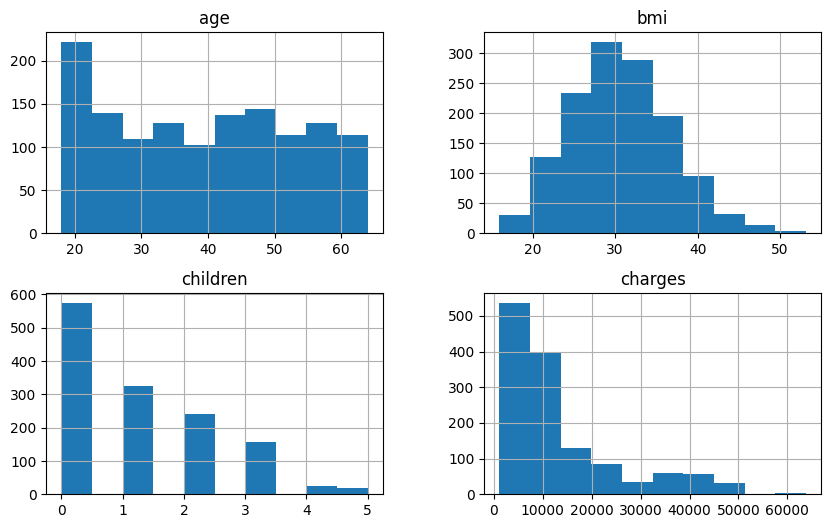

In [8]:
#UnivariateAnalysis
health_df.hist()
plt.show()

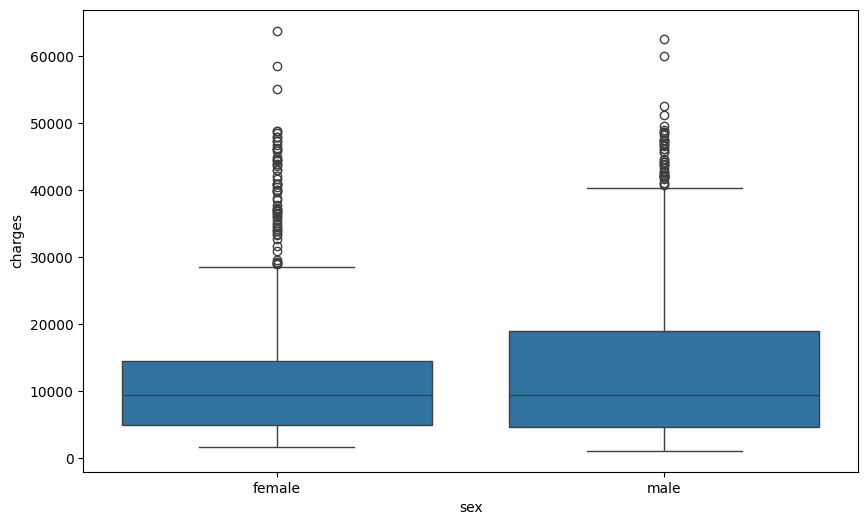

In [9]:
#BivariateAnalysis

sns.boxplot(x="sex",y="charges",data=health_df)
plt.show()

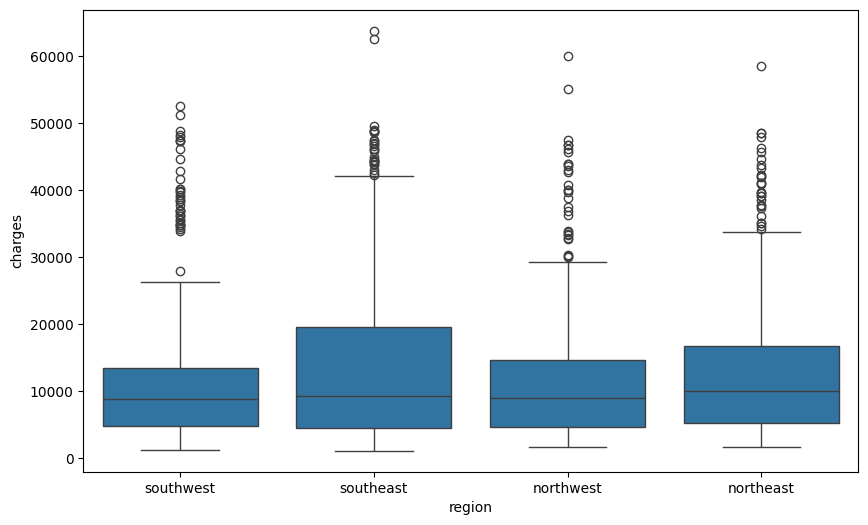

In [10]:
sns.boxplot(x="region",y="charges",data=health_df)
plt.show()

In [11]:
health_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

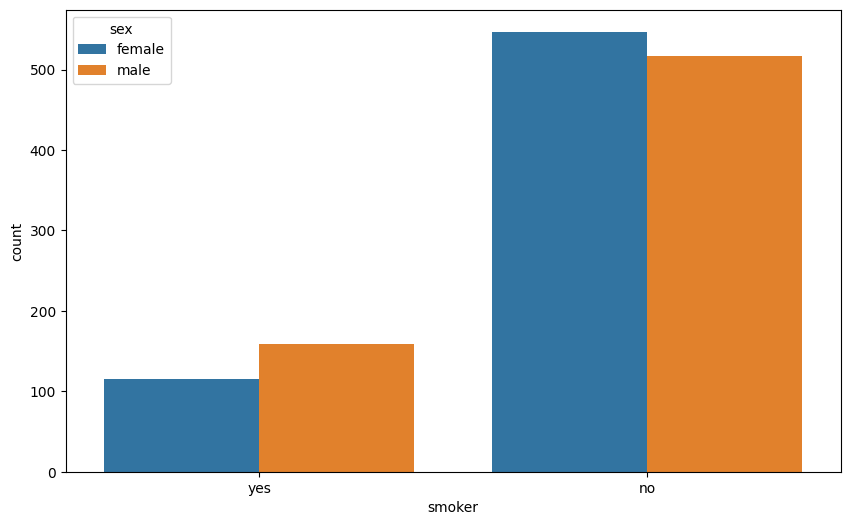

In [12]:
sns.countplot(x="smoker",hue="sex",data=health_df)
plt.show()

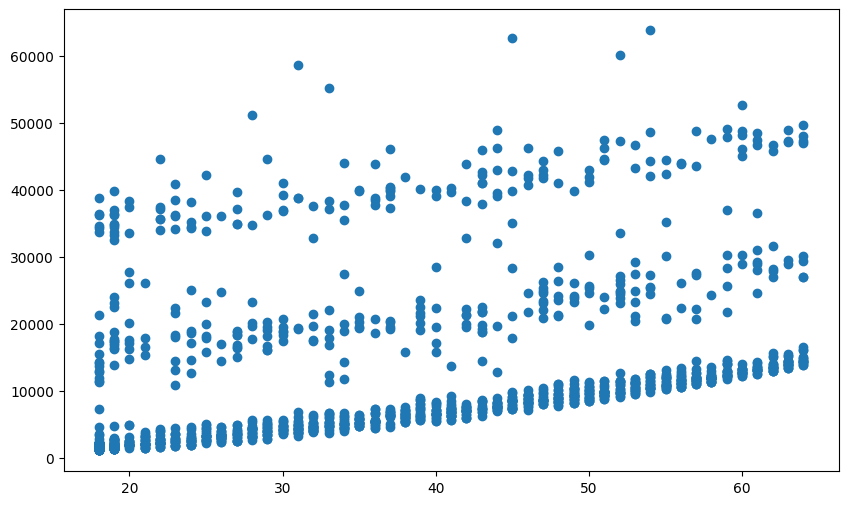

In [13]:
plt.scatter(x="age",y="charges",data=health_df)
plt.show()

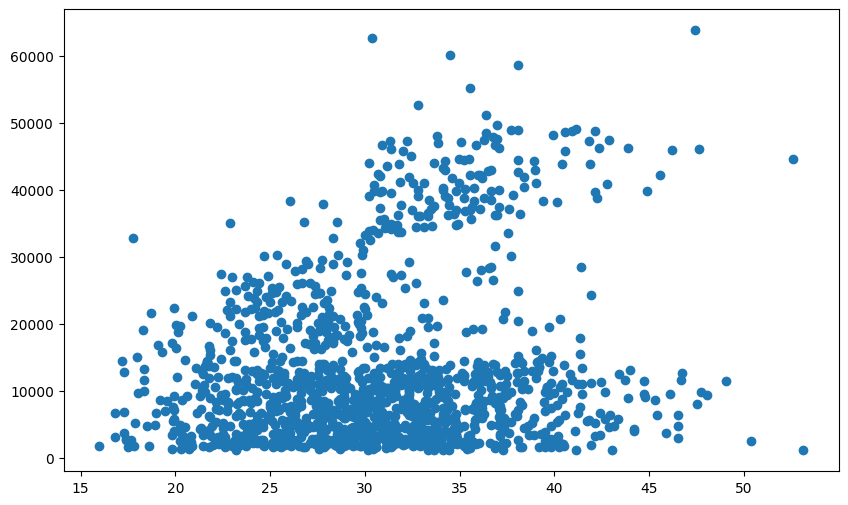

In [14]:
plt.scatter(x="bmi",y="charges",data=health_df)
plt.show()

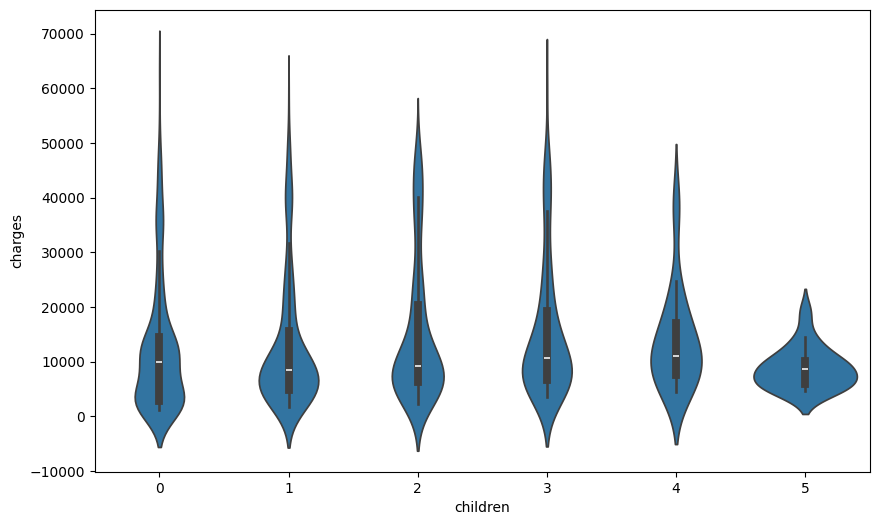

In [15]:
sns.violinplot(x="children",y="charges",data=health_df)
plt.show()

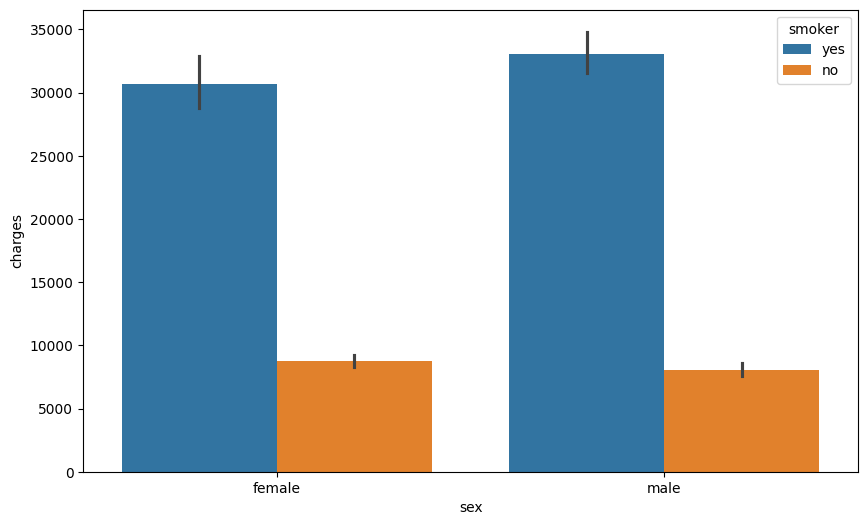

In [16]:
sns.barplot(x="sex",y="charges",hue="smoker",data=health_df)
plt.show()

In [17]:
import warnings

In [18]:
warnings.filterwarnings("ignore")

health_df.corr(numeric_only=True)  #numeric_only=True this has been passed bcoz corr is not working in new version

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


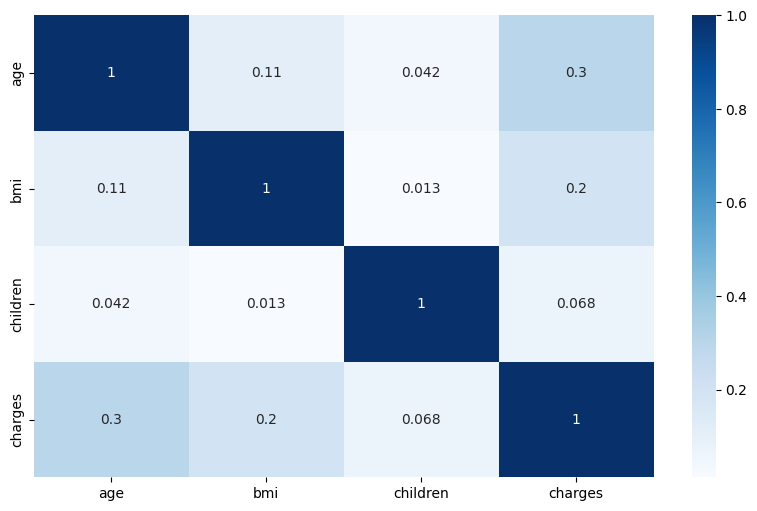

In [19]:
sns.heatmap(health_df.corr(numeric_only=True),cmap="Blues",annot=True)
plt.show()

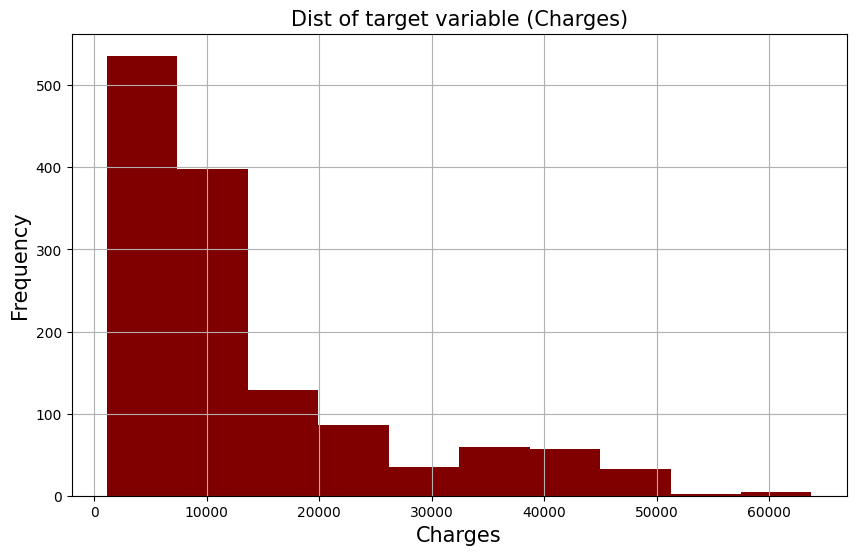

In [20]:
health_df.charges.hist(color="maroon")

plt.title("Dist of target variable (Charges)",fontsize=15)
plt.xlabel("Charges",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

plt.show()

In [21]:
health_df["log_charges"]=np.log(health_df["charges"])
health_df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


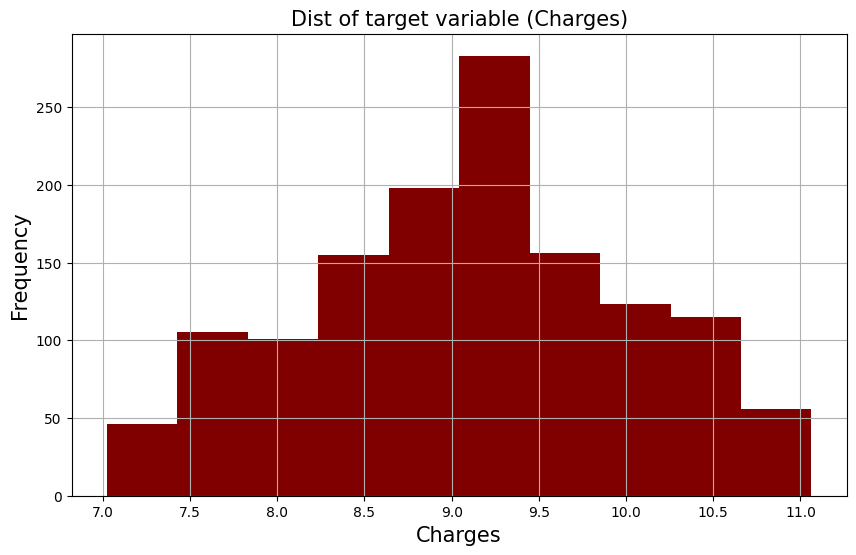

In [22]:
health_df.log_charges.hist(color="maroon")

plt.title("Dist of target variable (Charges)",fontsize=15)
plt.xlabel("Charges",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

plt.show()

In [23]:
df_numeric_features=health_df.select_dtypes(include=np.number)

df_numeric_features.columns

Index(['age', 'bmi', 'children', 'charges', 'log_charges'], dtype='object')

In [24]:
df_categoric_features=health_df.select_dtypes(include="object")

df_categoric_features.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [25]:
dummy_encoded_variables=pd.get_dummies(df_categoric_features, drop_first=True,dtype=int) #Will drop the first categorical data
# Dtype is addded bcoz to get o,1 bcoz in new version instead of 0,1 its coming like true,false

In [26]:
df_health_dummy=pd.concat([df_numeric_features,dummy_encoded_variables],axis=1)
df_health_dummy.head()

,age,bmi,children,charges,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,9.734176,0,1,0,0,1
1,18,33.770,1,1725.55230,7.453302,1,0,0,1,0
2,28,33.000,3,4449.46200,8.400538,1,0,0,1,0
3,33,22.705,0,21984.47061,9.998092,1,0,1,0,0
4,32,28.880,0,3866.85520,8.260197,1,0,1,0,0


In [27]:
df_health_dummy.shape

(1338, 10)

In [28]:
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf  #Specifically for linear regression
from statsmodels.formula.api import ols #Specifically for linear regression
from statsmodels.tools.eval_measures import rmse #Specifically for linear regression
from statsmodels.stats.outliers_influence import variance_inflation_factor #Specifically for linear regression


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [29]:
df_health_dummy = sm.add_constant(df_health_dummy)  #While running this will add another column as constant

X=df_health_dummy.drop(["charges","log_charges"],axis=1)
y=df_health_dummy["log_charges"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("The shape of X_train",X_train.shape)
print("The shape of X_test",X_test.shape)
print("The shape of y_train",y_train.shape)
print("The shape of y_test",y_test.shape)

The shape of X_train (936, 9)
The shape of X_test (402, 9)
The shape of y_train (936,)
The shape of y_test (402,)


In [31]:
linreg_logmodel_full = sm.OLS(y_train,X_train).fit()

print(linreg_logmodel_full.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     364.8
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          3.21e-280
Time:                        11:20:55   Log-Likelihood:                -584.34
No. Observations:                 936   AIC:                             1187.
Df Residuals:                     927   BIC:                             1230.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0919      0.088  

In [32]:
linreg_logmodel_full_predict=linreg_logmodel_full.predict(X_test)

In [33]:
predicted_charges=np.exp(linreg_logmodel_full_predict)

actual_charges = y_test

In [34]:
linreg_logmodel_full_rmse=rmse(actual_charges,predicted_charges)

linreg_logmodel_full_rsquared=linreg_logmodel_full.rsquared

linreg_logmodel_full_rsquared_adj=linreg_logmodel_full.rsquared_adj